# Support Vector Machine (SVM)

## Introduction
* SVM finds a **hyperplane** that separates the data into 2 classes
* The algorithm tries to maximize **margin** (the distance between the hyperplane and the nearest data point)


## Kernels
* SVM always produces a linear (straight-line) hyperplane 
    * ###INSERT A CIRCLE BOUNDARY HERE###
* A new feature can be constructed to create a straight-line hyperplane
    * This feature is then convertede back to the original feature to make predictions
* **Kernel** transforms non-separatable inputs into separable inputs (i.e. creates a new feature so that SVM can draw a hyperplane)

### Kernel Parameters in Scikit-Learn
* kernels: linear, poly (polynomial), rbf (radial basis function), etc.
* C: "cost" of  ignoring points for the sake of better overall fit
    * Higher value of C can lead to overfitting
* gamma: how far the influence of a single point goes
    * Lower gamma results in smoother boundary

    


## Considerations
### Use Cases
* Face detection
* Cancer classification

### Pros
* Separates complicated domains well

### Cons
* Does not perform well on large datasets (takes too long)
* Not great at handling noises



## Example: Iris Data
This example uses the iris data set (from scikit-learn) to try and classify the type of iris based on sepal length and width.

### Loading Data

In [145]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
x = iris.data[:, :2] #only dealing with 2 features
y = iris.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42) #saving 10% of the dataset for testing

### Plotting Data

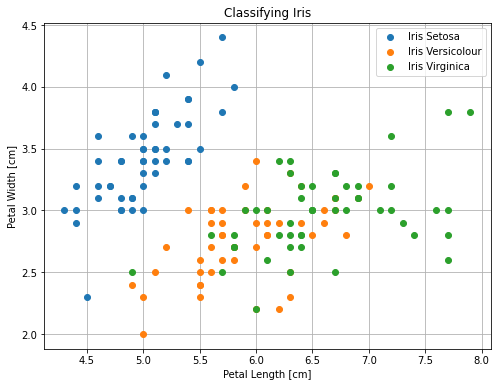

In [146]:
import numpy as np
import matplotlib.pyplot as plt
IRIS_LIST = ['Iris Setosa','Iris Versicolour','Iris Virginica']
COLOR_LIST = np.array(['tab:blue','tab:orange','tab:green'])
fig, ax = plt.subplots(figsize=[8,6])
ax.set_axisbelow(True)
ax.grid()

for i in range(3):
    low_lim = i*50
    high_lim = (i+1)*50
    ax.scatter(x[low_lim:high_lim, 0], x[low_lim:high_lim, 1], c=COLOR_LIST[i], label=IRIS_LIST[i])

ax.legend()
ax.set_xlabel('Petal Length [cm]')
ax.set_ylabel('Petal Width [cm]')
ax.set_title('Classifying Iris')
plt.show()

### Creating a Linear Classifier

In [147]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
_ = clf.fit(x_train, y_train) #fit the classifier to training data
score = clf.score(x_test, y_test)
print('The linear SVM has {:.2%} accuracy.'.format(score))


The linear SVM has 86.67% accuracy.


### Creating an RBF Classifier (C = 1)

In [148]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf', C=1.0)
_ = clf.fit(x_train, y_train) #fit the classifier to training data
score = clf.score(x_test, y_test)
print('The RBF SVM has {:.2%} accuracy.'.format(score))

The RBF SVM has 93.33% accuracy.


### Visualizing the RBF SVM

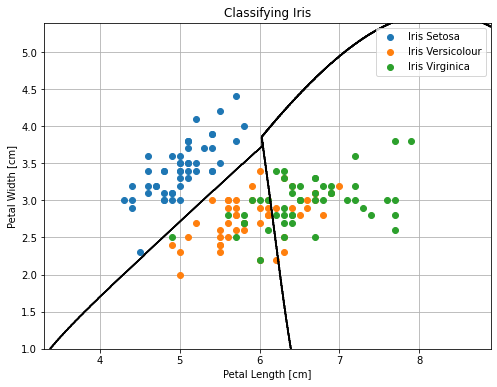

In [149]:
fig, ax = plt.subplots(figsize=[8,6])
ax.set_axisbelow(True)
ax.grid()

for i in range(3):
    low_lim = i*50
    high_lim = (i+1)*50
    ax.scatter(x[low_lim:high_lim, 0], x[low_lim:high_lim, 1], c=COLOR_LIST[i], label=IRIS_LIST[i])


x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.005),
                     np.arange(y_min, y_max, 0.005))
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])            
z = z.reshape(xx.shape)
plt.contour(xx, yy, z, colors='black')
ax.legend()
ax.set_xlabel('Petal Length [cm]')
ax.set_ylabel('Petal Width [cm]')
ax.set_title('Classifying Iris')
plt.show()